In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# Carregamento do arquivo excel usado para projeto
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(50)

Age  Gender      Income            Education Marital Status  \
0   25.0  Female   50.000,00    Bachelor's Degree         Single   
1   30.0    Male  100.000,00      Master's Degree        Married   
2   35.0  Female   75.000,00            Doctorate        Married   
3   40.0    Male  125.000,00  High School Diploma         Single   
4   45.0  Female  100.000,00    Bachelor's Degree        Married   
5   50.0    Male  150.000,00      Master's Degree        Married   
6   26.0  Female   40.000,00   Associate's Degree         Single   
7   31.0    Male   60.000,00    Bachelor's Degree         Single   
8    NaN  Female   80.000,00      Master's Degree        Married   
9    NaN    Male  105.000,00            Doctorate         Single   
10   NaN  Female   90.000,00  High School Diploma        Married   
11   NaN    Male  135.000,00    Bachelor's Degree        Married   
12   NaN  Female   35.000,00  High School Diploma         Single   
13   NaN    Male   55.000,00   Associate's Degree         Single   
14   NaN  Female   70.000,00    Bachelor's Degree        Married   
15   NaN    Male   95.000,00      Master's Degree         Single   
16   NaN  Female   85.000,00            Doctorate        Married   
17   NaN    Male  125.000,00  High School Diploma        Married   
18   NaN  Female   30.000,00   Associate's Degree         Single   
19   NaN    Male   50.000,00  High School Diploma         Single   
20   NaN  Female   65.000,00    Bachelor's Degree        Married   
21  43.0    Male   80.000,00      Master's Degree         Single   
22  48.0  Female   70.000,00            Doctorate        Married   
23  53.0    Male  115.000,00   Associate's Degree        Married   
24  29.0  Female   25.000,00  High School Diploma         Single   
25  34.0    Male   45.000,00   Associate's Degree         Single   
26  39.0  Female   60.000,00    Bachelor's Degree        Married   
27  44.0    Male   75.000,00      Master's Degree         Single   
28  49.0  Female   65.000,00            Doctorate        Married   
29  25.0  Female   55.000,00    Bachelor's Degree         Single   
30  30.0    Male  105.000,00      Master's Degree        Married   
31  35.0  Female   80.000,00            Doctorate        Married   
32  40.0    Male  130.000,00  High School Diploma         Single   
33  45.0  Female  105.000,00    Bachelor's Degree        Married   
34  50.0    Male  155.000,00      Master's Degree        Married   
35  26.0  Female   45.000,00   Associate's Degree         Single   
36  31.0    Male   65.000,00    Bachelor's Degree         Single   
37  36.0  Female   85.000,00      Master's Degree        Married   
38  41.0    Male  110.000,00            Doctorate         Single   
39  46.0  Female   95.000,00  High School Diploma        Married   
40  51.0    Male  140.000,00    Bachelor's Degree        Married   
41  27.0  Female   37.500,00  High School Diploma         Single   
42  32.0    Male   57.500,00   Associate's Degree         Single   
43  37.0  Female   72.500,00    Bachelor's Degree        Married   
44  42.0    Male  100.000,00      Master's Degree         Single   
45  47.0  Female   90.000,00            Doctorate        Married   
46  52.0    Male  130.000,00  High School Diploma        Married   
47  28.0  Female   32.500,00   Associate's Degree         Single   
48  33.0    Male   52.500,00  High School Diploma         Single   
49  38.0  Female   67.500,00    Bachelor's Degree        Married   

    Number of Children Home Ownership Credit Score  
0                    0         Rented         High  
1                    2          Owned         High  
2                    1          Owned         High  
3                    0          Owned         High  
4                    3          Owned         High  
5                    0          Owned         High  
6                    0         Rented      Average  
7                    0         Rented      Average  
8                    2          Owned         High  
9     

# ETAPA 1

**A) Verifique os tipos de dados, fazendo as transforma√ß√µes quando necess√°rio.**

In [3]:
# Verifica√ß√£o dos tipos de dados do Dataframe

df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

** Optei por alterar a coluna 'Age' de float para Int. Fiz essa altera√ß√£o porque n√£o vi necessidade da utiliza√ß√£o do float nessa coluna, e tamb√©m com o Int consigo economizar mem√≥ria.

** Alterei tamb√©m a coluna 'Number of children' de int64 para int32, porque como s√£o valores baixos tamb√©m consigo economizar mem√≥ria.**

In [9]:
# Altera√ß√£o da coluna 'Number of children' de int64 para int32
df['Number of Children'] = df['Number of Children'].astype('int32')

In [11]:
# Verifica√ß√£o das altera√ß√µes das colunas
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int32
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes fa√ßa o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [13]:
# Verifica√ß√£o dos dados nulos no Dataframe
print(df.isnull().sum())


# Calculando o percentual dos valores nulos na coluna 'Age'
percentual_nulos = df['Age'].isnull().mean() * 100
print(f"Percentual de valores nulos na coluna 'Age': {percentual_nulos:.2f}%")



Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Percentual de valores nulos na coluna 'Age': 20.73%


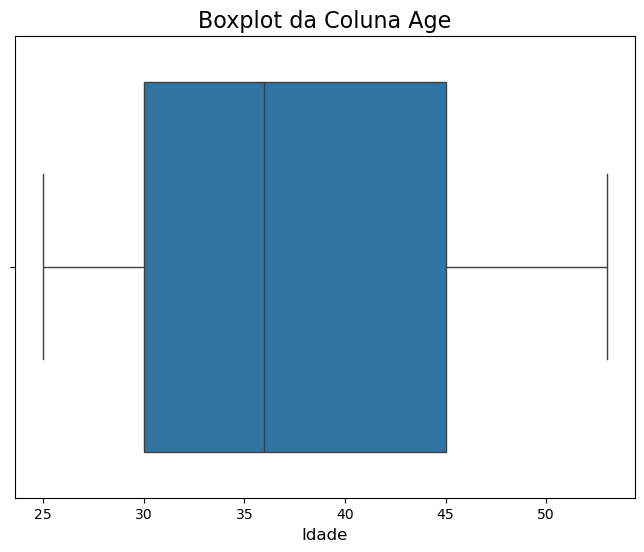

In [12]:
# Cria√ß√£o de um gr√°fico em Boxplot, para descobrir se tem Outliers na coluna 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])

# Adicionar t√≠tulo e r√≥tulos
plt.title('Boxplot da Coluna Age', fontsize=16)
plt.xlabel('Idade', fontsize=12)

# Mostrar o gr√°fico
plt.show()

** Com a observa√ß√£o do gr√°fico do Boxplot, decidi utilizar a mediana para alterar os dados nulos que tem na coluna 'Age'. Utilizei a mediana porque ela n√£o vai ser afetadas por Outliers, visto que n√£o tem segundo o gr√°fico e pela distribui√ß√£o "comportada" dos valores de idade.**

In [15]:
# Preenchendo os valores nulos da coluna 'Age' com a mediana.
df['Age'] = df['Age'].fillna(df['Age'].median())

**C) Verifique se temos valores digitados de forma incorreta nas vari√°veis categ√≥ricas que necessitem de tratamento.**

In [17]:
# Selecionando colunas das vari√°veis categ√≥ricas para verficar erros de digita√ß√£o
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exibi os valores √∫nicos para cada coluna categ√≥rica
for col in categorical_columns:
    print(f"Coluna '{col}': {df[col].unique()}")

Coluna 'Gender': ['Female' 'Male']
Coluna 'Income': ['50.000,00' '100.000,00' '75.000,00' '125.000,00' '150.000,00'
 '40.000,00' '60.000,00' '80.000,00' '105.000,00' '90.000,00' '135.000,00'
 '35.000,00' '55.000,00' '70.000,00' '95.000,00' '85.000,00' '30.000,00'
 '65.000,00' '115.000,00' '25.000,00' '45.000,00' '130.000,00'
 '155.000,00' '110.000,00' '140.000,00' '37.500,00' '57.500,00'
 '72.500,00' '32.500,00' '52.500,00' '67.500,00' '92.500,00' '82.500,00'
 '122.500,00' '27.500,00' '47.500,00' '62.500,00' '87.500,00' '77.500,00'
 '112.500,00' '117.500,00' '142.500,00' '160.000,00' '97.500,00'
 '145.000,00' '162.500,00' '120.000,00' '102.500,00' '137.500,00'
 '127.500,00' '82.000,00' '68.000,00']
Coluna 'Education': ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Coluna 'Marital Status': ['Single' 'Married']
Coluna 'Home Ownership': ['Rented' 'Owned']
Coluna 'Credit Score': ['High' 'Average' 'Low']


# ETAPA 2

**A) Realiza a an√°lise univariada, aplique a fun√ß√£o describe ao nosso dataframe para verificar os dados das vari√°veis num√©ricas, se encontrar a poss√≠vel presen√ßa de outliers analise com gr√°ficos a distribui√ß√£o dos dados.Traga insights sobre os dados analisados.**

In [19]:
# Fun√ß√£o para trazer vari√°veis quantitativas do Dataframe
df.describe()

Age  Number of Children
count  164.000000          164.000000
mean    37.195122            0.652439
std      7.586619            0.883346
min     25.000000            0.000000
25%     31.750000            0.000000
50%     36.000000            0.000000
75%     43.000000            1.000000
max     53.000000            3.000000

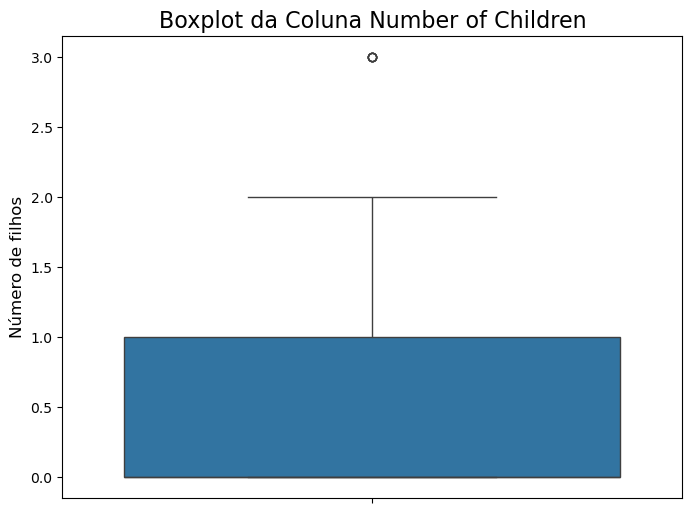

In [21]:
# Cria√ß√£o de um gr√°fico em Boxplot, para descobrir se tem Outliers na coluna 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Number of Children'])

# Adicionar t√≠tulo e r√≥tulos
plt.title('Boxplot da Coluna Number of Children', fontsize=16)
plt.ylabel('N√∫mero de filhos', fontsize=12)

# Mostrar o gr√°fico
plt.show()

In [23]:
# Calculando quantas fam√≠lias possuem o valor 3 para o n√∫mero de crian√ßas
num_families_with_3 = df[df['Number of Children'] == 3].shape[0]
print(f"N√∫mero de fam√≠lias com 3 crian√ßas: {num_families_with_3}")

N√∫mero de fam√≠lias com 3 crian√ßas: 5


In [25]:
# Calculando o percentual que representa o n√∫mero de fam√≠lias que possuem 3 crian√ßas dentro do Dataframe
total_families = len(df)
percent_with_3 = (num_families_with_3 / total_families) * 100
print(f"Percentual de fam√≠lias com 3 crian√ßas: {percent_with_3:.2f}%")

Percentual de fam√≠lias com 3 crian√ßas: 3.05%


# Justificativa: Decidi manter os dados de fam√≠lias com 3 crian√ßas.
1) Esses dados n√£o v√£o impactar a m√©dia e mediana da an√°lise;
2) Para fins de aprendizado de m√°quina, √© um dado interessante de se ter no Dataframe, para que o modelo n√£o fique enviesado para detectar apenas fam√≠lias com um n√∫mero pequeno de filhos.

# OBS: Como j√° tinha feito acima um boxplot de idade, n√£o trouxe ele novamente nesse t√≥pico.

**B) Agora realize a an√°lise univariada para as variaveis categ√≥ricas, plote gr√°ficos para entender a distribui√ß√£o das categorias e tente retirar insights de cada gr√°fico.**

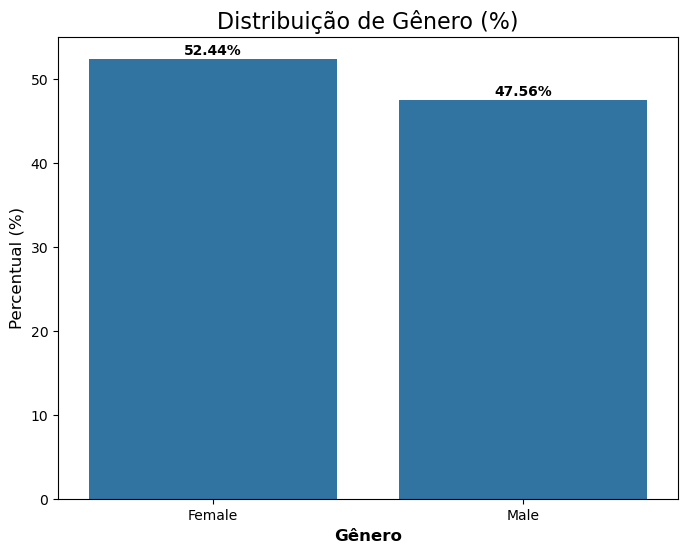

In [27]:
# Calculando a quantidade e percentual de cada g√™nero da coluna 'Gender'
contagem_genero = df['Gender'].value_counts()
percentual_genero = df['Gender'].value_counts(normalize=True) * 100

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_genero.index, y=percentual_genero)
plt.title('Distribui√ß√£o de G√™nero (%)', fontsize=16)
plt.xlabel('G√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_genero):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

## Insights coluna 'Gender'
** A informa√ß√£o que o gr√°fico nos mostra com um equil√≠brio entre os dois g√™neros, nos da ideia de que o produto √© amplamente aceitado.**

1) Pode se tentar fazer a√ß√µes de marketing para cada g√™nero, para testar a aceita√ß√£o de cada lado
2) Considerar produtos e servi√ßos que priorizem o p√∫blico feminino, j√° que representam a maioria. 

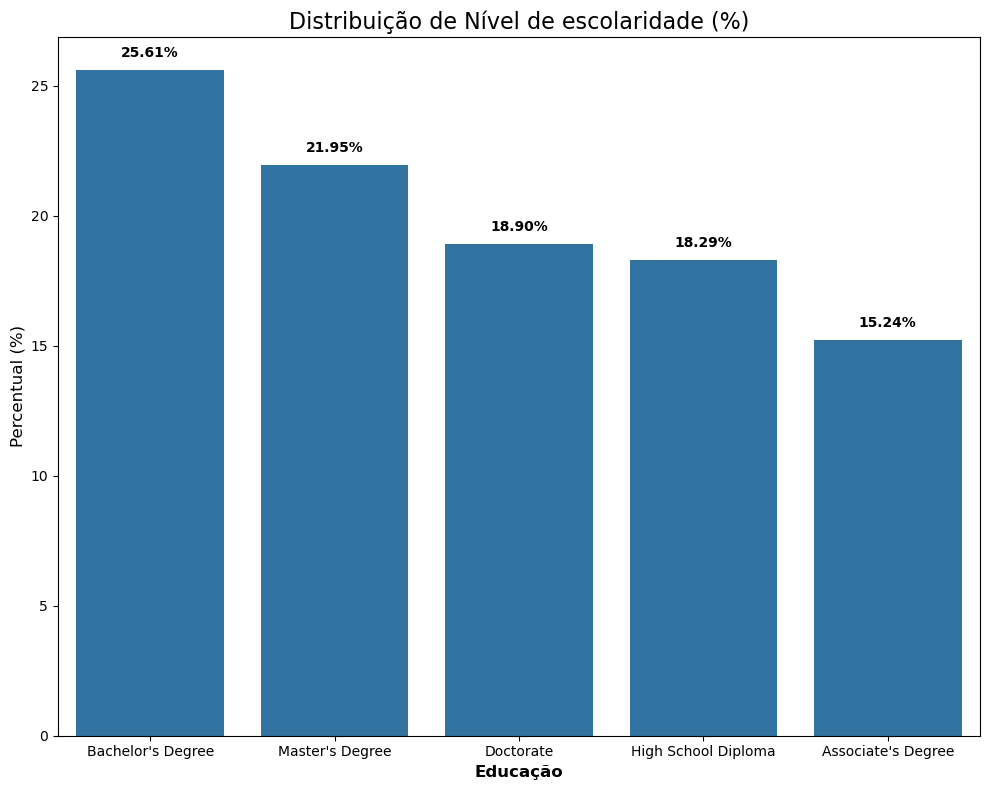

In [29]:
# Calculando a quantidade e percentual de cada tipo de ensindo da coluna 'Education'
contagem_educacao = df['Education'].value_counts()
percentual_educacao = df['Education'].value_counts(normalize=True) * 100

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=contagem_educacao.index, y=percentual_educacao)
plt.title('Distribui√ß√£o de N√≠vel de escolaridade (%)', fontsize=16)
plt.xlabel('Educa√ß√£o', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_educacao):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insights coluna 'Education'
** O gr√°fico nos mostra, que embora os percentuais de pessoas com maior escolaridade, representem uma base maior dos clientes, n√£o se pode deixar de lado as pessoas que n√£o tem um n√≠vel de ensino t√£o elevado, pois eleas tamb√©m representam um percentual consider√°vel no nosso Dataframe. Algumas a√ß√µes que podem ser tomadaas com base nos percentuais apresentado acima: **

1) Como Bachelor's Degree representa um quarto dos nossos clientes, campanhas podem ser pensadas para esse p√∫blico espec√≠fico, tentando fidelizar essa parcela dos clientes, ou at√© mesmo trazer mais clientes que possuem esse n√≠vel de ensino
2) Vale tamb√©m para as pessoas com n√≠vel de ensino mais baixo, campanhas com produtos mais acess√≠veis voltadadas para esse p√∫blico, tamb√©m podem ser ben√©ficas para reten√ß√£o dos clientes ou entrada de novos.

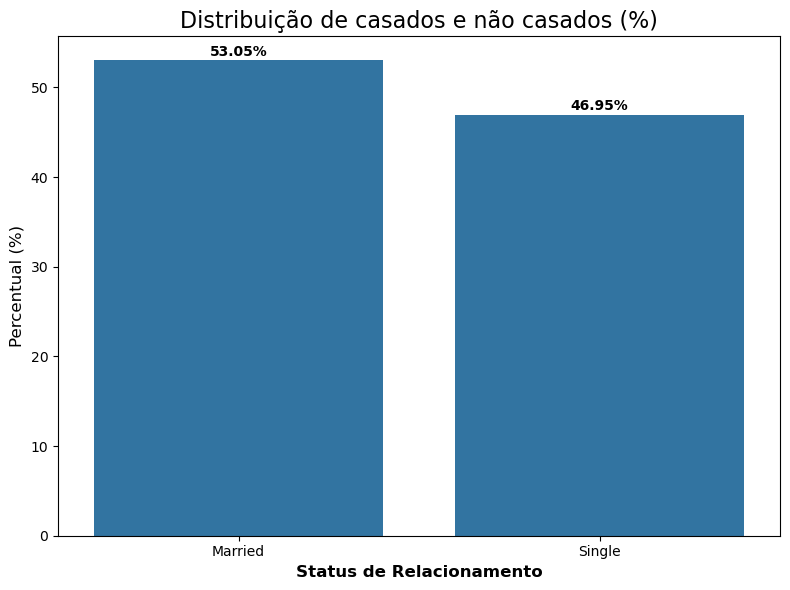

In [75]:
# Calculando a quantidade e percentual de Status de Relacionamento da coluna 'Marital Status'
contagem_status = df['Marital Status'].value_counts()
percentual_status = df['Marital Status'].value_counts(normalize=True) * 100

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_status.index, y=percentual_status)
plt.title('Distribui√ß√£o de casados e n√£o casados (%)', fontsize=16)
plt.xlabel('Status de Relacionamento', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_status):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insights coluna 'Marital Status'

** Como temos uma inclina√ß√£o para a maior parcela de clientes sendo casada, podemos tomar algumas a√ß√µes que listo logo abaixo: **

1) Desenvolver campanhas que enfatizem seguran√ßa, estabilidade financeira, e produtos/servi√ßos voltados para fam√≠lias.
2) Oferecer planos de longo prazo ou benef√≠cios que agreguem valor √† vida familiar.

** Para os n√£o casados, podemos tentar as seguintes a√ß√µes: **

1) Campanhas que enfoquem liberdade, inova√ß√£o, e desenvolvimento pessoal.
2) Oferecer op√ß√µes de pagamento mais flex√≠veis ou produtos que atendam √†s necessidades de uma vida mais independente.

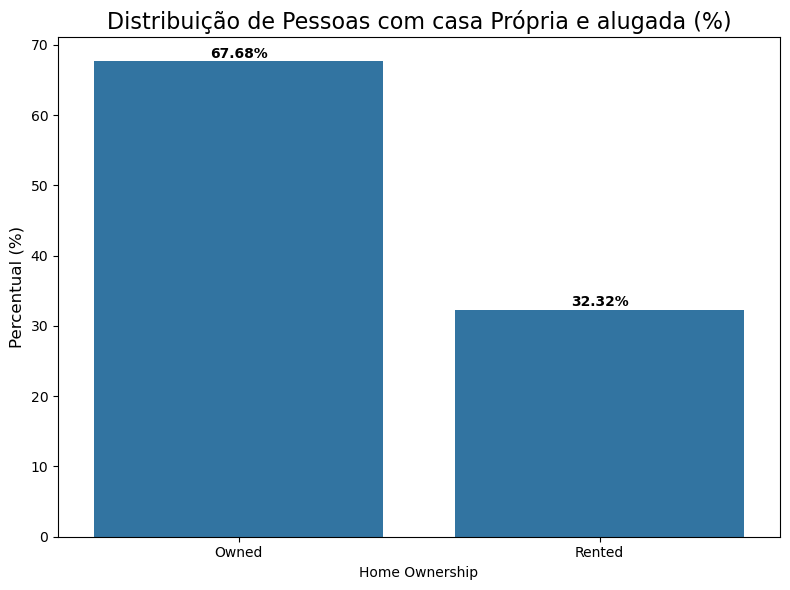

In [31]:
# Calculando a quantidade e percentual de pessoas que possuem casa pr√≥pria e alugada 'Home Ownership'
contagem_home = df['Home Ownership'].value_counts()
percentual_home = df['Home Ownership'].value_counts(normalize=True) * 100

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_home.index, y=percentual_home)
plt.title('Distribui√ß√£o de Pessoas com casa Pr√≥pria e alugada (%)', fontsize=16)
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_home):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insight coluna 'Home Ownership'

** Os dados mostram que temos um n√∫mero bem maior de pessoas que possuem casa pr√≥pria, com essa informa√ß√£o, algumas a√ß√µes que podemos tomar voltadas para essa parcela do p√∫blico, s√£o: **

1) Campanhas voltadas para reformas na casa
2) Promover servi√ßos financeiros como cr√©dito para melhorias ou seguros residenciais.

   ** Para as pessoas que n√£o tem casa pr√≥pria podemos focar em campanhas como: **
1) Programas de educa√ß√£o financeira ou financiamento para compra de im√≥veis.

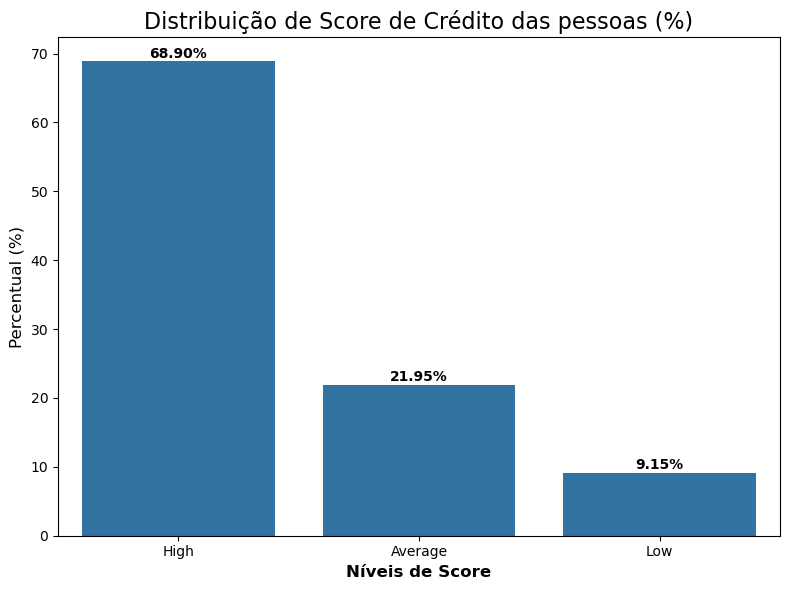

In [33]:
# Calculando a quantidade e percentual de Score de cr√©dito das pessoas 'Credit Score'
contagem_score = df['Credit Score'].value_counts()
percentual_score = df['Credit Score'].value_counts(normalize=True) * 100

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_score.index, y=percentual_score)
plt.title('Distribui√ß√£o de Score de Cr√©dito das pessoas (%)', fontsize=16)
plt.xlabel('N√≠veis de Score', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_score):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insight coluna 'Credit Score'

** Conseguimos ver atrav√©s do gr√°fico, que a maiorias dos clientes possue um score alto, o que indica uma base de clientes com bom hist√≥rico de cr√©dito, tendo isso em mente, podemos segmentar as campanhas, para todos os n√≠veis de score: **

## Clientes com Score alto

1) Oferecer produtos premium, como cart√µes de cr√©dito com limite alto, empr√©stimos com taxas reduzidas ou servi√ßos financeiros personalizados.
2) Enfatizar benef√≠cios que reforcem a lealdade desse p√∫blico, j√° que eles t√™m maior valor para a institui√ß√£o.

## Clientes com Score m√©dio

1) Oferecer produtos intermedi√°rios que ajudem a melhorar o score, como cart√µes de cr√©dito b√°sicos ou programas de educa√ß√£o financeira.
2) Desenvolver estrat√©gias para elevar esse grupo para a categoria de score alto.

## Clientes com Score baixo

1) Criar produtos financeiros espec√≠ficos para esse grupo, como microcr√©dito ou programas de refinanciamento para reestrutura√ß√£o de d√≠vidas.
2) Implementar iniciativas para reduzir o risco, como limites de cr√©dito mais baixos ou garantias adicionais.

**C) Voc√™ encontrou alguma coluna com outliers? 
Se sim realize o tratamento desses casos.**

## √önica coluna que encontrei Outliers, foi a de 'Number of Children' a qual, decidi deixar o Outlier visando a ideia de ter esses dados para um poss√≠vel aprendizado de m√°quina.

**D) Realize a an√°lise Bivariada.
Tente responder as seguintes perguntas com gr√°ficos seguidos de insights:**



*   Existe rela√ß√£o entre a idade e o status civil?
*   Qual a rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade?
*  O sal√°rio parece influenciar na idade?
* O sal√°rio parece influenciar no Score de Cr√©dito?
* Clientes com casa pr√≥pria tendem a ter um score mais alto?

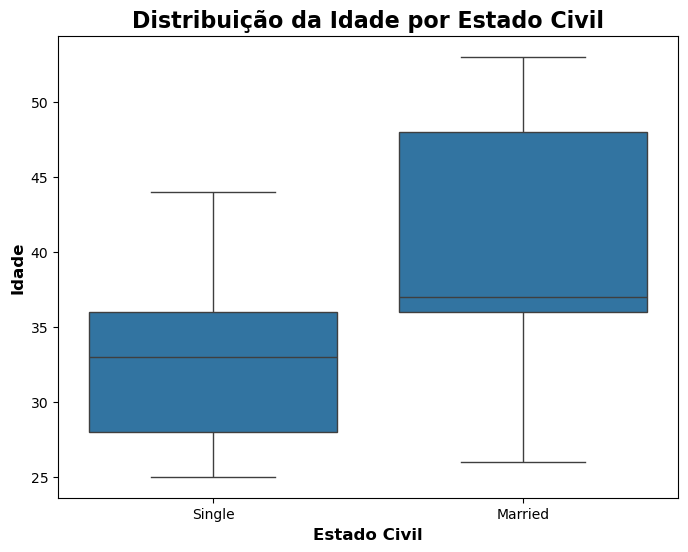

In [35]:
# Gr√°fico de Boxplot rela√ß√£o entre idade e estado civil
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Marital Status'], y=df['Age'])

plt.title('Distribui√ß√£o da Idade por Estado Civil', fontsize=16, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12, fontweight='bold')
plt.ylabel('Idade', fontsize=12, fontweight='bold')

plt.show()

# Insights sobre Rela√ß√£o entre Idade e estado civil:

** Conseguimos ver pelo gr√°fico que pessoas casadas, tendem a pertencer a faixas et√°rias mais altas. Sugerindo que o p√∫blico mais velho, pode ter prioridades diferentes, como estabilidade financeira, planejamento de longo prazo e maior propens√£o a investimentos.**

** Enquanto isso, o p√∫blico mais jovem, tende a estar solteiro, nos dando o insight de que podem ser tomadas a√ß√µes para oferecer servi√ßos flex√≠veis, como financiamentos sem fidelidade, programas de interc√¢mbio, viagens e educa√ß√£o continuada.

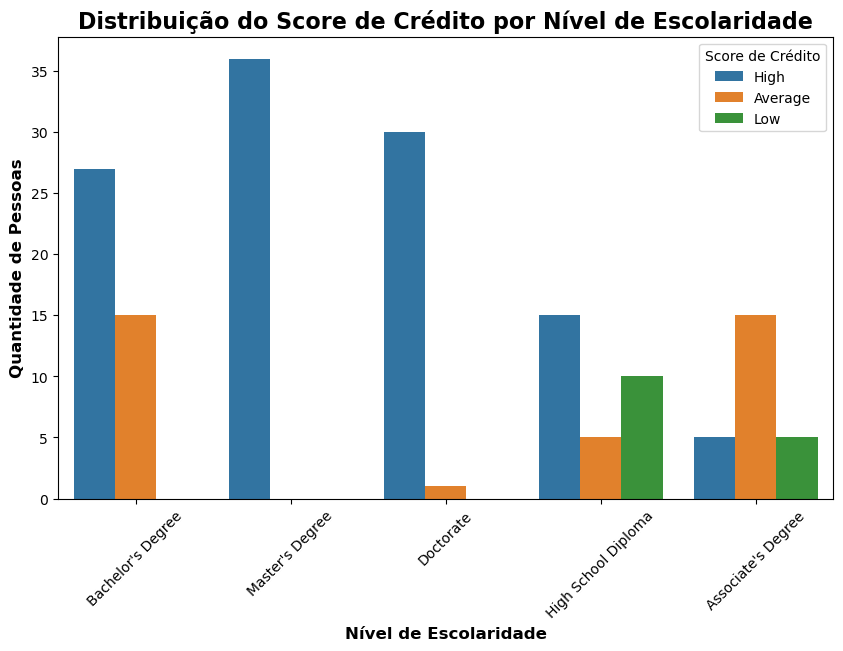

In [37]:
# Gr√°fico de Barras para rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education', hue='Credit Score', order=df['Education'].value_counts().index)

plt.title('Distribui√ß√£o do Score de Cr√©dito por N√≠vel de Escolaridade', fontsize=16, fontweight='bold')
plt.xlabel('N√≠vel de Escolaridade', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Pessoas', fontsize=12, fontweight='bold')

plt.legend(title='Score de Cr√©dito')
plt.xticks(rotation=45)
plt.show()

# Insights rela√ß√£o Score de Cr√©dito e Escolaridade

Conseguimos ver que pessoas com maior n√≠vel de escolaridade, tem score de cr√©dito maior, abaixo listo algumas a√ß√µes que podem ser tomadas com base nas informa√ß√µes que tivemos com o gr√°fico:

1) Clientes com alto n√≠vel educacional (Master‚Äôs e Doctorate) podem receber ofertas de cr√©dito premium, pois tendem a ser mais confi√°veis financeiramente.
2) Clientes com Associate‚Äôs Degree e High School Diploma podem precisar de orienta√ß√£o financeira para melhorar o score.
3) Programas de educa√ß√£o financeira podem ser aplicados a grupos com menor escolaridade para ajud√°-los a melhorar seu hist√≥rico de cr√©dito.

<Figure size 1000x600 with 0 Axes>

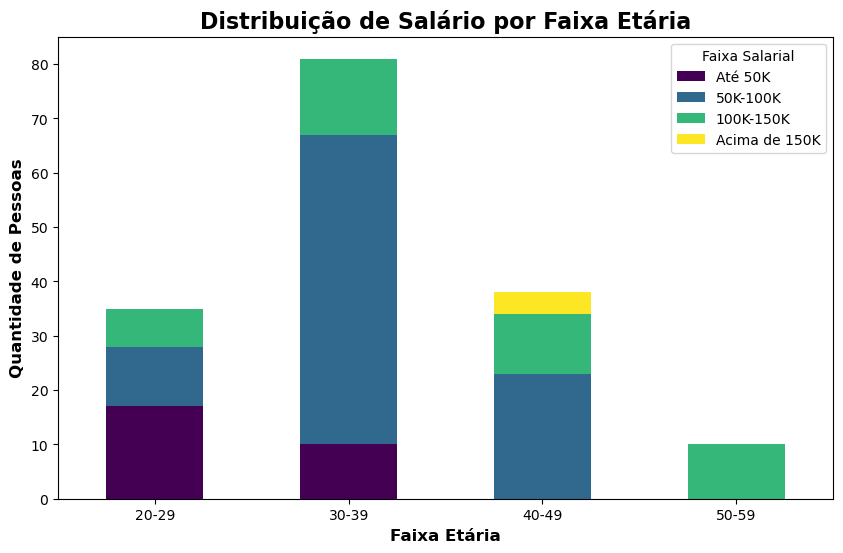

In [63]:
# Converter Income para float, removendo v√≠rgulas
df['Income'] = df['Income'].astype(str).str.replace(',', '').astype(float)

# Criando faixas et√°rias
bins_age = [20, 30, 40, 50, 60]  
labels_age = ['20-29', '30-39', '40-49', '50-59']  # R√≥tulos das faixas
df['Faixa Et√°ria'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Criando faixas de sal√°rio
bins_income = [0, 50000, 100000, 150000, 200000]  # Intervalos de sal√°rio
labels_income = ['At√© 50K', '50K-100K', '100K-150K', 'Acima de 150K']  # R√≥tulos das faixas
df['Faixa Salarial'] = pd.cut(df['Income'], bins=bins_income, labels=labels_income)

# Contagem de pessoas por faixa et√°ria e faixa salarial
grouped_data = df.groupby(['Faixa Et√°ria', 'Faixa Salarial'], observed=False).size().unstack()

# Criar o gr√°fico de barras empilhado
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")

plt.title('Distribui√ß√£o de Sal√°rio por Faixa Et√°ria', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Et√°ria', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Pessoas', fontsize=12, fontweight='bold')
plt.legend(title='Faixa Salarial')
plt.xticks(rotation=0)  # Manter r√≥tulos das idades na horizontal

plt.show()

# Insights sobre Sal√°rio por Faixa Et√°ria

Os dados mostram que 30-39 anos √© o auge salarial, indicando a necessidade de estrat√©gias para reten√ß√£o e crescimento. Jovens (20-29) t√™m sal√°rios mais baixos, sugerindo programas de capacita√ß√£o profissional. A faixa de 40-49 anos apresenta maior diversidade salarial, sendo ideal para planos de carreira personalizados e incentivos. A baixa presen√ßa de 50-59 anos pode indicar aposentadoria ou falta de oportunidades. Al√©m disso, sal√°rios mais altos ocorrem em idades avan√ßadas, refor√ßando a import√¢ncia de previd√™ncia e investimentos de longo prazo.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

In [83]:
from scipy import stats

# Calcular estat√≠sticas descritivas da renda por n√≠vel de escolaridade
education_income_stats = df.groupby('Education')['Income'].describe()

# Exibir estat√≠sticas descritivas
display(education_income_stats)

count           mean           std      min      25%  \
Education                                                                   
Associate's Degree    25.0   60880.000000  32605.367656  30000.0  45000.0   
Bachelor's Degree     42.0   79428.571429  28353.296240  50000.0  60500.0   
Doctorate             31.0   87903.225806  13284.966036  65000.0  79000.0   
High School Diploma   30.0   79633.333333  44115.431137  25000.0  38000.0   
Master's Degree       36.0  104777.777778  23975.119378  75000.0  88000.0   

                         50%       75%       max  
Education                                         
Associate's Degree   48000.0   58000.0  128000.0  
Bachelor's Degree    68000.0   94500.0  150000.0  
Doctorate            85000.0   92500.0  120000.0  
High School Diploma  71000.0  128750.0  142000.0  
Master's Degree      97500.0  112000.0  162000.0

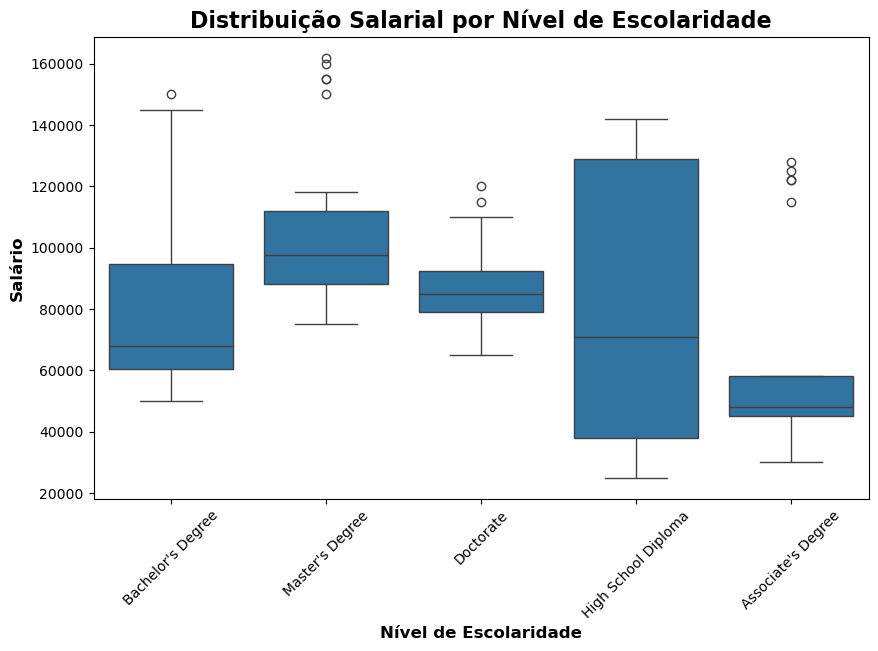

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Education'], y=df['Income'], order=df['Education'].value_counts().index)

plt.title('Distribui√ß√£o Salarial por N√≠vel de Escolaridade', fontsize=16, fontweight='bold')
plt.xlabel('N√≠vel de Escolaridade', fontsize=12, fontweight='bold')
plt.ylabel('Sal√°rio', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.show()


In [75]:
# Criar lista de sal√°rios agrupados por n√≠vel de escolaridade
groups = [df[df['Education'] == level]['Income'] for level in df['Education'].unique()]

# Teste ANOVA
anova_result = stats.f_oneway(*groups)

print(f"Valor-p do teste ANOVA: {anova_result.pvalue:.4f}")

Valor-p do teste ANOVA: 0.0000


Resolvi fazer uma an√°lise para saber se o N√≠vel de Escolaridade Influencia na Renda?

# Conclus√£o: O N√≠vel de Escolaridade Influencia na Renda?

Com base na **an√°lise estat√≠stica, boxplot e m√©dias salariais**, podemos confirmar que **o n√≠vel de escolaridade tem um impacto significativo na renda**.

## üîπ 1Ô∏è‚É£ O teste ANOVA confirma diferen√ßas salariais por escolaridade
- O **p-valor do teste ANOVA foi 0.0000**, indicando que **h√° diferen√ßas estatisticamente significativas** entre os sal√°rios dos diferentes n√≠veis de escolaridade.
- Isso significa que **ao menos um grupo tem uma m√©dia salarial diferente dos outros**, refor√ßando que **a educa√ß√£o influencia o sal√°rio**.

## üîπ 2Ô∏è‚É£ An√°lise das m√©dias salariais por escolaridade
| **N√≠vel de Escolaridade**    | **M√©dia Salarial ($)** |
|------------------------------|------------------------|
| **Associate's Degree**       | **60,880**            |
| **Bachelor's Degree**        | **79,428**            |
| **Doctorate**                | **87,903**            |
| **High School Diploma**      | **79,633**            |
| **Master's Degree**          | **104,778**           |

## üîπ 3Ô∏è‚É£ Boxplot confirma varia√ß√£o nos sal√°rios
- O **Master‚Äôs Degree apresenta os sal√°rios mais elevados e a menor dispers√£o**.
- O **High School Diploma tem uma distribui√ß√£o salarial muito ampla**, sugerindo que **pode haver exce√ß√µes** de pessoas com ensino m√©dio ganhando altos sal√°rios, mas **n√£o √© a norma**.
- **Associate‚Äôs Degree tem a menor varia√ß√£o**, indicando que os sal√°rios nessa categoria s√£o mais **consistentes, mas limitados**.

## üîπ 4Ô∏è‚É£ Conclus√£o final
‚úÖ **Sim, o n√≠vel de escolaridade influencia a renda**.  
- Indiv√≠duos com **maior n√≠vel educacional tendem a ter sal√°rios mais altos**.
- A **m√©dia salarial cresce conforme o n√≠vel de escolaridade aumenta**, especialmente para **Master‚Äôs Degree e Doctorate**.
- Pessoas com **Associate‚Äôs Degree ou High School Diploma t√™m renda significativamente menor**.
- O **teste ANOVA confirma que a diferen√ßa √© estatisticamente significativa**.

üéØ **Implica√ß√µes pr√°ticas:**  
- Investir em **educa√ß√£o formal pode ser um fator determinante para alcan√ßar sal√°rios mais altos**.  
- Empresas podem **usar esse dado para estruturar planos de carreira e remunera√ß√£o**.  
- Pessoas com **High School Diploma e Associate‚Äôs Degree podem se beneficiar de especializa√ß√µes** para aumentar sua renda.



# ETAPA 3

**A) Vamos come√ßar pela an√°lise de correla√ß√£o, plote da forma que achar melhor a an√°lise de correla√ß√£o, seja pela tabela ou pelo gr√°fico da matriz.**

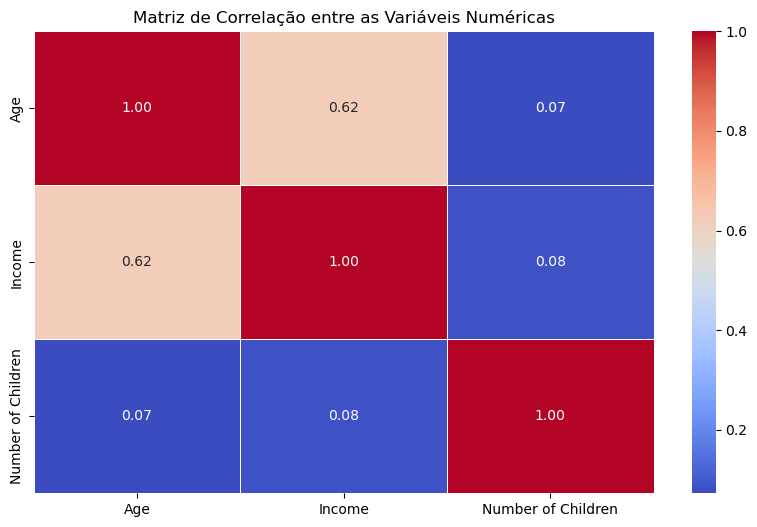

In [92]:
# Converte a coluna 'Income' para float, removendo pontos e v√≠rgulas
df['Income'] = df['Income'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Seleciona apenas colunas num√©ricas para a an√°lise de correla√ß√£o
df_numeric = df.select_dtypes(include=['number'])

# Calcula a matriz de correla√ß√£o
correlation_matrix = df_numeric.corr()

# Plota a matriz de correla√ß√£o como um mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correla√ß√£o entre as Vari√°veis Num√©ricas")
plt.show()

**B) Voc√™ encontrou vari√°veis que tem uma m√©dia ou alta correla√ß√£o? Se sim, quais? Te parece fazer sentido essas vari√°veis terem alta correla√ß√£o? Justifique.**

### **1Ô∏è‚É£ Vari√°veis com Correla√ß√£o M√©dia-Alta**
Sim, encontramos uma correla√ß√£o **moderada-forte** entre **Idade e Renda** (**0.69**). Nenhuma outra vari√°vel apresentou correla√ß√£o relevante.

---

### **2Ô∏è‚É£ Justificativa para a Correla√ß√£o Alta entre Idade e Renda**
- Esse resultado **faz sentido**, pois **quanto maior a idade, maior tende a ser a renda**.
- Pessoas mais velhas geralmente **t√™m mais experi√™ncia profissional**, o que as leva a:
  - **Ocupar cargos mais altos**.
  - **Receber promo√ß√µes ao longo do tempo**.
  - **Possuir maior estabilidade financNossa a
- Nossa an√°lise anterior j√° havia mostrado que **a renda cresce conforme a idade**, o que refor√ßa essa orrela√ß√£o.
 correla√ß√£o.
 correla√ß√£o.


**C) Temos muitos atributos categ√≥ricos nessa base, n√£o? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Ap√≥s, exclua as colunas categ√≥ricas.**

In [101]:
from sklearn.preprocessing import LabelEncoder

# Identificando as colunas categ√≥ricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Criando um dicion√°rio para armazenar os LabelEncoders aplicados
label_encoders = {}

# Aplicando Label Encoding para todas as colunas categ√≥ricas
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardando o encoder caso seja necess√°rio reverter depois

# Excluindo as colunas categ√≥ricas originais
df = df.drop(columns=categorical_columns)

# Exibir as primeiras linhas do DataFrame atualizado
df.head()

Age      Income  Number of Children Faixa Et√°ria Faixa Salarial
0  25.0   5000000.0                   0        20-29        At√© 50K
1  30.0  10000000.0                   2        20-29       50K-100K
2  35.0   7500000.0                   1        30-39       50K-100K
3  40.0  12500000.0                   0        30-39      100K-150K
4  45.0  10000000.0                   3        40-49       50K-100K

**D) Vamos plotar novamente a correla√ß√£o, agora observando com as vari√°veis categ√≥ricas. Identifique se temos novas vari√°veis com forte correla√ß√£o.**

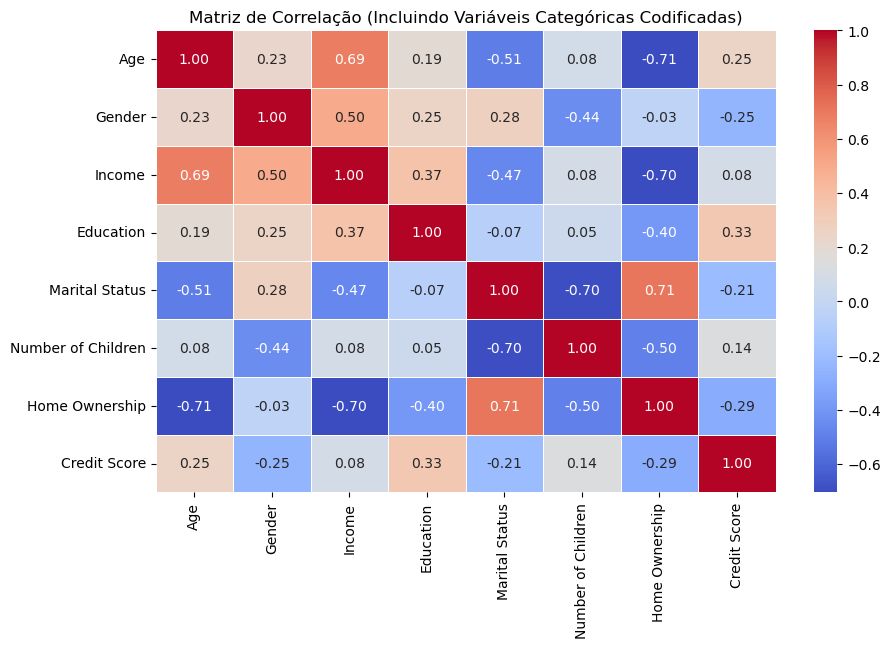

In [105]:
# Recarregando os dados originais para manter as colunas categ√≥ricas
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

# Convertendo Income para float novamente
df['Income'] = df['Income'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Aplicando Label Encoding as colunas categ√≥ricas
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecionando apenas colunas num√©ricas novamente (agora incluindo as categ√≥ricas codificadas)
df_numeric_with_categorical = df.select_dtypes(include=['number'])

# Calculando a matriz de correla√ß√£o
correlation_matrix = df_numeric_with_categorical.corr()

# Plotando a matriz de correla√ß√£o como um mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correla√ß√£o (Incluindo Vari√°veis Categ√≥ricas Codificadas)")
plt.show()


### **üìå Novas Vari√°veis com Correla√ß√£o Forte**
Al√©m da correla√ß√£o j√° observada entre **Idade e Renda (0.69)**, foram encontradas outras correla√ß√µes relevantes:

#### **1Ô∏è‚É£ Home Ownership e Idade (-0.71)**
- **Interpreta√ß√£o:** Pessoas **mais velhas tendem a possuir casa pr√≥pria**, enquanto **pessoas mais jovens geralmente alugam**.
- Esse resultado **faz sentido**, pois ao longo do tempo, indiv√≠duos acumulam patrim√¥nio e t√™m mais estabilidade para comprar um im√≥vel.

#### **2Ô∏è‚É£ Home Ownership e Renda (-0.70)**
- **Interpreta√ß√£o:** Pessoas **com maior renda** t√™m maior probabilidade de possuir um im√≥vel.
- Essa correla√ß√£o negativa pode indicar que **pessoas com renda mais baixa t√™m maior propens√£o a alugar im√≥veis**.

#### **3Ô∏è‚É£ Marital Status e Home Ownership (0.71)**
- **Interpreta√ß√£o:** Pessoas **casadas t√™m maior probabilidade de possuir im√≥vel pr√≥prio**.
- Esse resultado tamb√©m √© esperado, pois casais costumam buscar estabilidade financeira e patrimonial.

#### **4Ô∏è‚É£ Gender e Income (0.50)**
- **Interpreta√ß√£o:** Foi encontrada uma **diferen√ßa de renda entre g√™neros**, o que pode indicar uma tend√™ncia de desigualdade salarial ou maior representatividade de um g√™nero em cargos mais altos.

**E) Fa√ßa a separa√ß√£o da base em treino e teste e verifique utilizando shape:**

In [108]:
from sklearn.model_selection import train_test_split

# Separando features (X) e target (y)
X = df.drop(columns=["Credit Score"])  # Removendo a vari√°vel alvo do conjunto de features
y = df["Credit Score"]  # Definindo a vari√°vel alvo

# Separando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando os shapes das bases
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

(X_train_shape, X_test_shape, y_train_shape, y_test_shape)

((131, 7), (33, 7), (131,), (33,))

**F) √â hora de verificar se nossa coluna de Score de cr√©dito est√° balanceada, verifique atrav√©s de um gr√°fico e traga sua opini√£o acerca do balanceamento.**

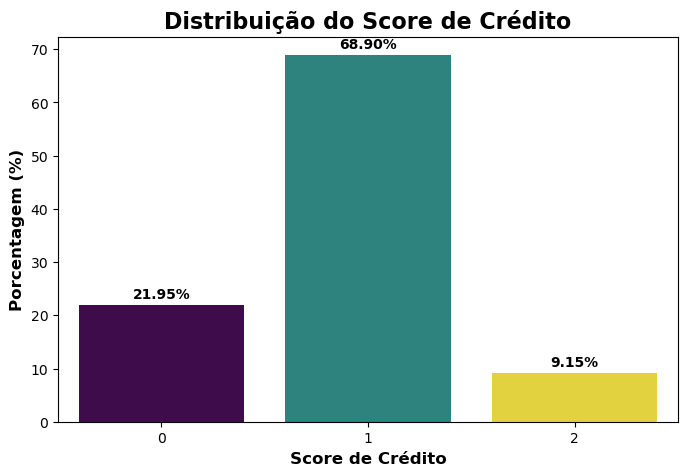

In [126]:
# Criando gr√°fico de barras para visualizar o balanceamento
plt.figure(figsize=(8,5))
ax = sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette="viridis")

plt.title("Distribui√ß√£o do Score de Cr√©dito", fontsize=16, fontweight='bold')
plt.xlabel("Score de Cr√©dito", fontsize=12, fontweight='bold')
plt.ylabel("Porcentagem (%)", fontsize=12, fontweight='bold')

# Remove a legenda desnecess√°ria
ax.legend_.remove()

# Ajusta a posi√ß√£o dos valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Garante que s√≥ √© adicionado anota√ß√µes quando h√° um valor v√°lido
        ax.annotate(f"{height:.2f}%", 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Ajuste baseado na altura
                    textcoords="offset points",
                    ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()

### **üìå An√°lise do Balanceamento do Score de Cr√©dito**
O gr√°fico mostra a distribui√ß√£o da vari√°vel **Score de Cr√©dito** e os percentuais de cada classe:

- **Score 1 (Alto)** ‚Üí **68.90%**
- **Score 0 (M√©dio)** ‚Üí **21.95%**
- **Score 2 (Baixo)** ‚Üí **9.15%**

---

### **üìä O Score de Cr√©dito est√° balanceado?**
**N√£o, a base de dados est√° desbalanceada.**  
- A classe **Score 1 (Alto)** √© **predominante**, representando quase **70% dos dados**.
- A classe **Score 2 (Baixo)** tem apenas **9.15%** dos registros, sendo a menos representada.
- Esse desbalanceamento pode impactar modelos de Machine Learning, fazendo com que eles priorizem a predi√ß√£o da classe mais frequente (**Score 1**), reduzindo a capacidade de prever corretamente os Scores **M√©dio** e **Baixo**.

---

### **üìå O que pode ser feito para lidar com esse desbalanceamento?**
1. **T√©cnicas de reamostragem:**
   - **Oversampling**: Aumentar artificialmente a quantidade de registros das classes menos representadas.
   - **Undersampling**: Reduzir a quantidade de registros da classe majorit√°ria.

2. **Usar m√©tricas adequadas na modelagem:**
   - O **Accuracy** pode n√£o ser uma boa m√©trica, pois pode estar enviesado para a classe majorit√°ria.
   - Usar m√©tricas como **F1-score, Precision e Recall** pode ajudar a avaliar melhor o desempenho do modelo.

3. **Ajuste de pesos no modelo:**
   - Alguns algoritmos permitem atribuir **pesos diferentes para cada classe**, reduzindo o ipacto do desbalanceamento.


**G) Vamos realizar o balancecamento dos dados da coluna de credit score. 
Se lembre que realizazmos apenas para a base de treino**.

In [133]:
from sklearn.utils import resample

# Combinando X_train e y_train para facilitar a manipula√ß√£o
train_data = pd.concat([X_train, y_train], axis=1)

# Separando as classes
majority_class = train_data[train_data["Credit Score"] == train_data["Credit Score"].value_counts().idxmax()]
minority_class = train_data[train_data["Credit Score"] != train_data["Credit Score"].value_counts().idxmax()]

# Fazendo Oversampling da classe minorit√°ria
minority_class_resampled = resample(minority_class, 
                                    replace=True,  # Permiti duplica√ß√£o de registros
                                    n_samples=len(majority_class),  # Iguala a classe majorit√°ria
                                    random_state=42)

# Reunindo as classes balanceadas
train_balanced = pd.concat([majority_class, minority_class_resampled])

# Separando X_train_bal e y_train_bal
X_train_bal = train_balanced.drop(columns=["Credit Score"])
y_train_bal = train_balanced["Credit Score"]

# Verificando a nova distribui√ß√£o das classes
y_train_bal.value_counts(normalize=True) * 100


Credit Score
1    50.000000
0    38.333333
2    11.666667
Name: proportion, dtype: float64

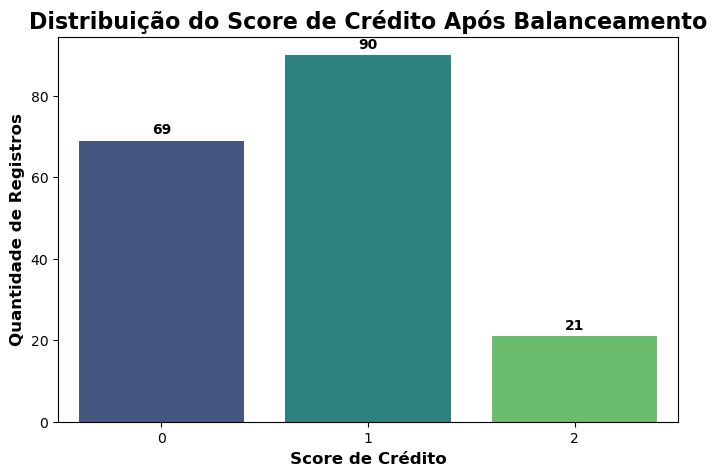

In [143]:
# Criando gr√°fico para visualizar a distribui√ß√£o das classes balanceadas
plt.figure(figsize=(8,5))
ax = sns.barplot(x=y_train_bal.value_counts().index, 
                 y=y_train_bal.value_counts().values, 
                 hue=y_train_bal.value_counts().index.astype(str),  # Converte para string para evitar mensagens de aten√ß√£o
                 palette="viridis")

plt.title("Distribui√ß√£o do Score de Cr√©dito Ap√≥s Balanceamento", fontsize=16, fontweight='bold')
plt.xlabel("Score de Cr√©dito", fontsize=12, fontweight='bold')
plt.ylabel("Quantidade de Registros", fontsize=12, fontweight='bold')

# Verifica se a legenda existe antes de remover
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Adiciona os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}",  # Convertendo para inteiro para exibir valores inteiros
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5),  # Ajuste da posi√ß√£o do texto
                textcoords="offset points",
                ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()

### **üìä Considera√ß√µes Finais sobre o Balanceamento**
#### **1Ô∏è‚É£ O balanceamento foi parcial e n√£o ficou totalmente homog√™neo**
- Apesar de termos ajustado a distribui√ß√£o, ainda h√° uma **discrep√¢ncia entre as classes**.
- A classe **Score 1 (Alto)** continua sendo a mais representada (**90 registros**).
- A classe **Score 2 (Baixo)** tem apenas **21 registros**, o que pode ainda impactar o modelo.

#### **2Ô∏è‚É£ O impacto do desbalanceamento pode ser reduzido, mas ainda existe**
- O modelo ainda pode apresentar **desempenho inferior na classe menos representada** (**Score 2 - Baixo**).
- Podemos considerar t√©cnicas adicionais para **melhorar a representatividade da classe minorit√°ria**, como:
  - **Ajuste de pesos no modelo** (ex.: `class_weight` em modelos como RandomForest e Logistic Regression).
  - **T√©cnicas de reamostragem mais refinadas** (ex.: combinar Oversampling + Undersampling).

#### **3Ô∏è‚É£ As classes agora est√£o mais equilibradas que antes**
- Antes, a classe **Score 1 representava quase 70% dos dados**, e agora essa propor√ß√£o foi reduzida.
- Isso pode permitir que **os modelos de Machine Learning tenham um aprendizado mais equilibrado**, reduzindo o vi√©s para a classe majorit√°ria.